# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?


## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**

### Written Explanation

```
1. Assuming a completely random distribution of data, I would assume that the approximate probability that the first digit is 1 is 1/9. This means that the percentage of values that will have its first digit as 1 will be 1/9 * 100% ~= 0.11 * 100% = 11%. The reasoning for this is because we ignore leading zeros; there are nine remaining digits (1 through 9). So, assuming a random distribution there is a one out of nine probability to get a 1.

Similarly, the same percentage (11%) of numbers would have their first digit be 9. There is no real difference between 1 and 9 if we are assuming a random distribution, as they are both part of the same pool of distinct numbers that all have a 1/9 possibility of being chosen as the first digit of a given data point.

2. In the case of the last digit distribution, we would now actually include 0 in our variable space. So, there are now 10 possibilities for the last digit. Thus, assuming that each of the 10 possibilities have the same probability of being chosen, we would have a 1/10 probability of choosing a particular one of them. In terms of percentage, about 1/10 * 100% = 10% of the values will contain a particular last digit.
```

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file `sp500.csv` contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
# ENTER YOUR CODE HERE.

import pandas as pd
df = pd.read_csv("sp500.csv")
df = df.set_index('volume').sort_index()
df.head()


,date,Name,open,close
volume,,,,
150920,2018-02-01,MTD,$676.00,$684.11
281384,2018-02-01,ADS,$256.26,$257.11
296010,2018-02-01,RE,$228.77,$230.14
319634,2018-02-01,AIZ,$91.40,$93.06
321622,2018-02-01,AZO,$761.32,$764.38


**ENTER YOUR WRITTEN EXPLANATION HERE.**

### Written explanation

```
- The unit of observation in this data set is stocks in the S&P 500 stock index over the time period February 1, 2018.

- A variable that would be natural for the index would be the volume of the stock traded. The volume traded is valuable because it signifies how popular and how much interaction the stock has. Also, generally the stocks in each row will have different, unique volumes that have been traded over the period of one day. It would be difficult to trade the exact same volume for two different stocks, which makes the volume a good indexing column.

```

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

d:\Documents\School\Classes\Spring 2022\CS105\labs\lab1\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


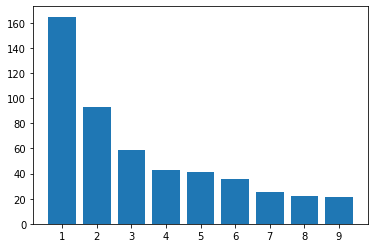

In [2]:
df.volume = df.index.astype(str)
digit_freq = df.volume.str[0].value_counts()

import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(digit_freq.index, digit_freq)
plt.show()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

```
- Both of the charts are very different from my prediction. According to my prediction, each of the categories (1 through 9) should have approximately 11% of the sample. According to our bar plot, digit 1 has a significantly higher percentage than other digits. There must be a different distribution apart from an equal probability for every digit.
```

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

In [3]:
# ENTER YOUR CODE HERE.

from IPython.display import display

# Set new column of last digits
df["vol_last_digit"] = df.index.astype(str).str[-1:]

# Display new DataFrame
print("New DataFrame after adding last digit column:")
display(df.head(10))
print("")

New DataFrame after adding last digit column:


,date,Name,open,close,vol_last_digit
volume,,,,,
150920,2018-02-01,MTD,$676.00,$684.11,0
281384,2018-02-01,ADS,$256.26,$257.11,4
296010,2018-02-01,RE,$228.77,$230.14,0
319634,2018-02-01,AIZ,$91.40,$93.06,4
321622,2018-02-01,AZO,$761.32,$764.38,2
360015,2018-02-01,PCLN,"$1,903.99","$1,903.69",5
393462,2018-02-01,TDG,$315.96,$315.20,2
443670,2018-02-01,COO,$243.35,$243.61,0
453178,2018-02-01,WAT,$214.16,$217.37,8


In [4]:
x = [i for i in range(0, 10)]
y = [i for i in df["vol_last_digit"].value_counts().sort_index()]
print(x, '\n', y)

# Function to add labels into plot
# Geeks4Geeks helped with this function
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, y[i], ha='center')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
 [52, 53, 56, 48, 40, 44, 51, 52, 56, 53]


Bar chart:


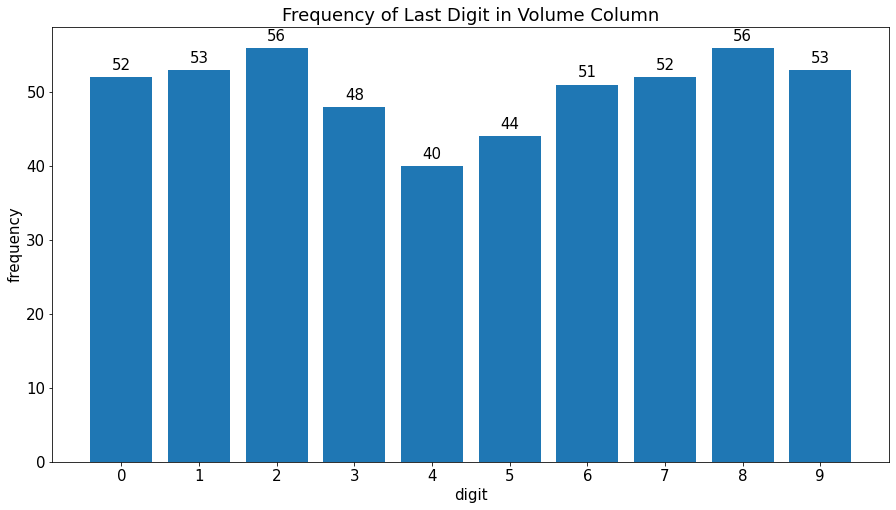

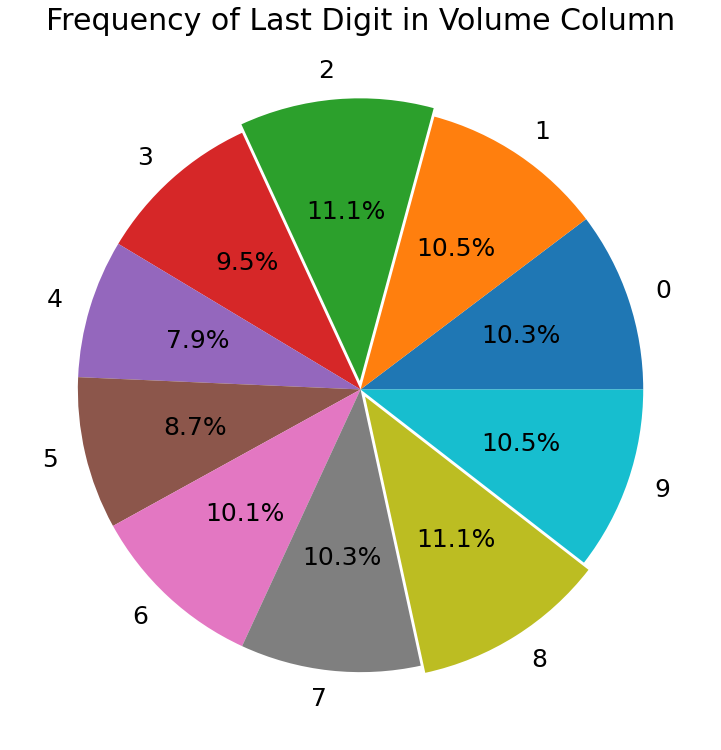

In [5]:
import matplotlib as mp

# Bar chart
# I had to set it up this way because of bar labels
mp.rcParams['font.size'] = 15
print("Bar chart:")
plt.figure(figsize=(15, 8))
plt.bar(x, y)
add_labels(x, y)
plt.title("Frequency of Last Digit in Volume Column")
plt.xlabel("digit")
plt.ylabel("frequency")
plt.xticks(x)
plt.show()
print("")

# Pie chart
mp.rcParams['font.size'] = 25
df["vol_last_digit"].value_counts().sort_index().plot(kind="pie", rot=1, title="Frequency of Last Digit in Volume Column", autopct='%1.1f%%', label="", explode=(0, 0, 0.03, 0, 0, 0, 0, 0, 0.03, 0), figsize=(13, 13))
plt.show()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

```
- As a comparison, it seems as though the distribution of last digits is much more evenly distributed than the distribution of first digits. The distribution of the first digits has a right skew, whereas the distribution of last digits has almost no skew. Thus, it would seem as though the distribution of last digits in the volume traded is more randomized than the distribution of the first digit.
```

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

In [6]:
# ENTER YOUR CODE HERE.

# Set new column of last digits
df["close_first_digit"] = df['close'].astype(str).str[1:2]

# Display new DataFrame
print("New DataFrame after adding closing price first digit column:")
display(df.head(10))
print("")

New DataFrame after adding closing price first digit column:


,date,Name,open,close,vol_last_digit,close_first_digit
volume,,,,,,
150920,2018-02-01,MTD,$676.00,$684.11,0,6
281384,2018-02-01,ADS,$256.26,$257.11,4,2
296010,2018-02-01,RE,$228.77,$230.14,0,2
319634,2018-02-01,AIZ,$91.40,$93.06,4,9
321622,2018-02-01,AZO,$761.32,$764.38,2,7
360015,2018-02-01,PCLN,"$1,903.99","$1,903.69",5,1
393462,2018-02-01,TDG,$315.96,$315.20,2,3
443670,2018-02-01,COO,$243.35,$243.61,0,2
453178,2018-02-01,WAT,$214.16,$217.37,8,2


In [7]:
x = [i for i in range(1, 10)]
y = [i for i in df["close_first_digit"].value_counts().sort_index()]
print(x, '\n', y)

# Function to add labels into plot
# Geeks4Geeks helped with this function
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i+1, y[i]+1, y[i], ha='center')

[1, 2, 3, 4, 5, 6, 7, 8, 9] 
 [171, 55, 52, 43, 39, 48, 43, 28, 26]


Bar chart:


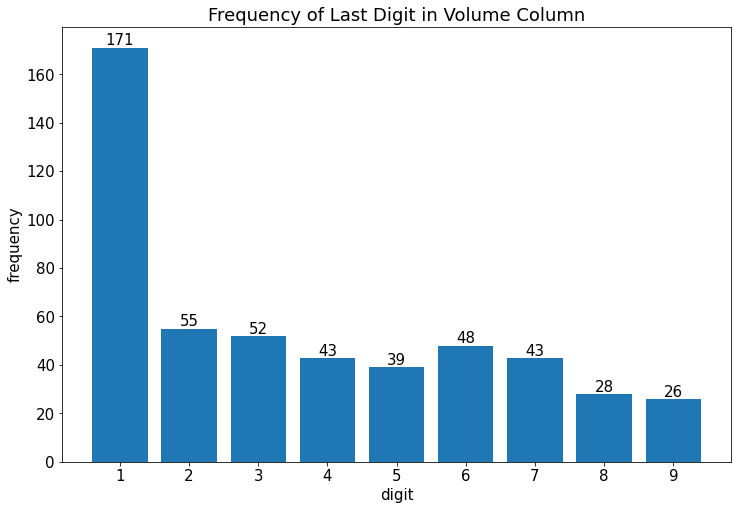

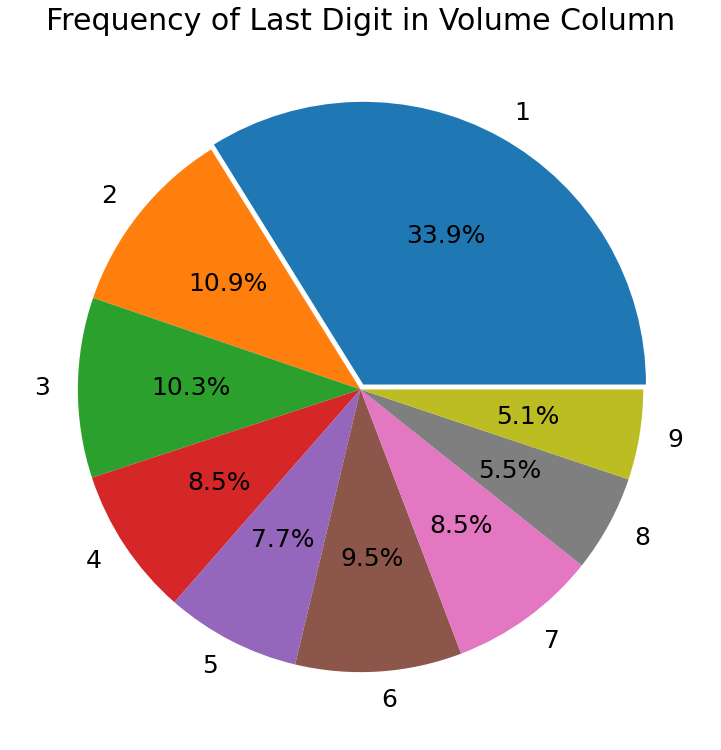

In [8]:
# Bar chart
# I had to set it up this way because of bar labels
mp.rcParams['font.size'] = 15
print("Bar chart:")
plt.figure(figsize=(12, 8))
plt.bar(x, y)
add_labels(x, y)
plt.title("Frequency of Last Digit in Volume Column")
plt.xlabel("digit")
plt.ylabel("frequency")
plt.xticks(x)
plt.show()
print("")

# Pie chart
mp.rcParams['font.size'] = 25
df["close_first_digit"].value_counts().sort_index().plot(kind="pie", rot=1, title="Frequency of Last Digit in Volume Column", autopct='%1.1f%%', label="", explode=(0.02, 0, 0, 0, 0, 0, 0, 0, 0), figsize=(13, 13))
plt.show()

**ENTER YOUR WRITTEN EXPLANATION HERE.**

```
- What I see is that there is approximately the same distribution for this variable as there is for the volume variable. The first digits seem to be mostly clustered at 1. The reason might be because typically lower volumes and lower closing prices are more typical, as more popular stocks are rarer. Thus, the distribution would cluster around lower values, in this case 1.
```

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Demo your lab to obtain credit.  

2. Upload your .ipyn Notebook to iLearn and pdf to Gradescope.